In [12]:
# 必要なパッケージのインストール
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
import matplotlib.pyplot as plt

# 3. ニューラルネットワークの定義

In [27]:
# 変数の定義
x1 = torch.randn(1,1)

# モデルの定義
model = nn.Sequential(
    nn.Linear(1,1),
    nn.Linear(1,1),
    nn.Linear(1,1)
) 

y = model(x1)
print(y)
y.backward()

tensor([[0.6665]], grad_fn=<AddmmBackward>)


In [28]:
model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Linear(in_features=1, out_features=1, bias=True)
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [29]:
print(model[0].weight)
print(model[0].bias)

Parameter containing:
tensor([[-0.8854]], requires_grad=True)
Parameter containing:
tensor([-0.3245], requires_grad=True)


In [30]:
for params in model.parameters():
  print(params)

Parameter containing:
tensor([[-0.8854]], requires_grad=True)
Parameter containing:
tensor([-0.3245], requires_grad=True)
Parameter containing:
tensor([[0.3548]], requires_grad=True)
Parameter containing:
tensor([0.4919], requires_grad=True)
Parameter containing:
tensor([[0.8263]], requires_grad=True)
Parameter containing:
tensor([0.4639], requires_grad=True)


In [32]:
print(model[0].weight.grad)
print(model[0].bias.grad)

print(model[1].weight.grad)
print(model[1].bias.grad)

print(model[2].weight.grad)
print(model[2].bias.grad)

tensor([[0.1229]])
tensor([0.2932])
tensor([[-0.5747]])
tensor([0.8263])
tensor([[0.2452]])
tensor([1.])


# 4 損失関数

## 4.1. バイナリ交差エントロピー損失（nn.BCELoss）

In [3]:
m = nn.Sigmoid()  # シグモイド関数
y = torch.rand(3)  # 予測値（ロジット）, データ数は3つ
t = torch.empty(3, dtype=torch.float32).random_(2)  # 正解クラス（全2クラス）
criterion = nn.BCELoss()  # 損失関数の設定
loss = criterion(m(y), t)  # 予測値と正解値との誤差を計算

# 変数の中身を表示
print("y: {}".format(y))
print("m(y): {}".format(m(y)))
print("t: {}".format(t))
print("loss: {:.4f}".format(loss))

y: tensor([0.4779, 0.2516, 0.3059])
m(y): tensor([0.6173, 0.5626, 0.5759])
t: tensor([1., 0., 0.])
loss: 0.7224


## 4.2. ロジット付きバイナリ交差エントロピー損失（nn.BCEWithLogitsLoss）

In [4]:
y = torch.rand(3)  # 予測値（ロジット）, データ数は3つ
t = torch.empty(3, dtype=torch.float32).random_(2)  # 正解クラス（全2クラス）
criterion = nn.BCEWithLogitsLoss()  # 損失関数の設定
loss = criterion(y, t)  # 予測値と正解値との誤差を計算

# 変数の中身を表示
print("y: {}".format(y))
print("t: {}".format(t))
print("loss: {:.4f}".format(loss))

y: tensor([0.2263, 0.5660, 0.6541])
t: tensor([1., 1., 0.])
loss: 0.7029


## 4.3. ソフトマックス交差エントロピー損失（nn.CrossEntropyLoss）

In [5]:
y = torch.rand(3, 5)  # 予測値（ロジット）, データ数は3つで各クラスに対する出力を持つ
t = torch.empty(3, dtype=torch.int64).random_(5)  # 正解クラス（全5クラス）
criterion = nn.CrossEntropyLoss()  # 損失関数の設定
loss = criterion(y, t)  # 予測値と正解値との誤差を計算

# 変数の中身を表示
print("y: {}".format(y))
print("t: {}".format(t))
print("loss: {:.4f}".format(loss))

y: tensor([[0.2526, 0.6135, 0.5923, 0.8394, 0.8395],
        [0.9608, 0.5875, 0.9803, 0.6135, 0.2787],
        [0.4498, 0.4397, 0.5113, 0.3481, 0.3517]])
t: tensor([1, 4, 0])
loss: 1.7584


## 4.4. 平均二乗誤差損失（nn.MSELoss）

In [6]:
y = torch.rand(1, 10)  # ネットワークが予測した予測値
t = torch.rand(1, 10)  # 正解値
criterion = nn.MSELoss()  # 損失関数の設定
loss = criterion(y, t)  # 予測値と正解値との誤差を計算

# 変数の中身を表示
print("y: {}".format(y))
print("t: {}".format(t))
print("loss: {:.4f}".format(loss))

y: tensor([[0.5601, 0.2530, 0.4296, 0.3303, 0.3437, 0.9469, 0.4782, 0.7922, 0.2007,
         0.5743]])
t: tensor([[0.3978, 0.4505, 0.2583, 0.0425, 0.9717, 0.8198, 0.9027, 0.5107, 0.8106,
         0.9305]])
loss: 0.1346


## 4.5. 平均絶対誤差損失（nn.L1Loss）

In [7]:
y = torch.rand(1, 10)  # ネットワークが予測した予測値
t = torch.rand(1, 10)  # 正解値
criterion = nn.L1Loss()  # 損失関数の設定
loss = criterion(y, t)  # 予測値と正解値との誤差を計算

# 変数の中身を表示
print("y: {}".format(y))
print("t: {}".format(t))
print("loss: {:.4f}".format(loss))

y: tensor([[0.9155, 0.8567, 0.2302, 0.5041, 0.3517, 0.2730, 0.4739, 0.2310, 0.2354,
         0.9233]])
t: tensor([[0.1188, 0.5155, 0.8613, 0.9174, 0.9851, 0.9141, 0.4763, 0.5332, 0.2130,
         0.8641]])
loss: 0.3843


# 5. 最適化関数

In [ ]:
# ニューラルネットワークの定義
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = self.linear2(x)
        return x

In [8]:
# ハイパーパラメータの定義
N = 64  # バッチサイズ: 64 → 一度の勾配計算に用いるデータの数
D_in = 1000  # 入力次元: 1000
H = 100  # 隠れ層次元: 100
D_out = 10  # 出力次元: 10
epoch = 100 # 学習回数

# データの生成
x = torch.rand(N, D_in)  # 入力データ
y = torch.rand(N, D_out)  # 正解値

# ネットワークのロード
net = Net(D_in, H, D_out)

# 損失関数
criterion = nn.MSELoss()

# 最適化関数
optimizer = optim.Adam(net.parameters(), lr=1e-4, betas=(0.9, 0.99), eps=1e-07)

loss_list = []  # 学習ごとの誤差を格納するリスト
# 学習
for i in range(epoch):
    # データを入力して予測値を計算（順伝播）
    y_pred = net(x)
    # 損失（誤差）を計算
    loss = criterion(y_pred, y)
    print("Epoch: {}, Loss: {:.3f}".format(i+1, loss.item()))  # 誤差を表示
    loss_list.append(loss.item())  # 誤差をリスト化して記録

    # 勾配の初期化
    optimizer.zero_grad()
    # 勾配の計算（逆伝搬）
    loss.backward()
    # パラメータ（重み）の更新
    optimizer.step()

Epoch: 1, Loss: 0.369
Epoch: 2, Loss: 0.327
Epoch: 3, Loss: 0.290
Epoch: 4, Loss: 0.257
Epoch: 5, Loss: 0.228
Epoch: 6, Loss: 0.203
Epoch: 7, Loss: 0.181
Epoch: 8, Loss: 0.162
Epoch: 9, Loss: 0.146
Epoch: 10, Loss: 0.132
Epoch: 11, Loss: 0.122
Epoch: 12, Loss: 0.113
Epoch: 13, Loss: 0.106
Epoch: 14, Loss: 0.101
Epoch: 15, Loss: 0.098
Epoch: 16, Loss: 0.095
Epoch: 17, Loss: 0.094
Epoch: 18, Loss: 0.093
Epoch: 19, Loss: 0.093
Epoch: 20, Loss: 0.093
Epoch: 21, Loss: 0.093
Epoch: 22, Loss: 0.094
Epoch: 23, Loss: 0.094
Epoch: 24, Loss: 0.094
Epoch: 25, Loss: 0.094
Epoch: 26, Loss: 0.093
Epoch: 27, Loss: 0.093
Epoch: 28, Loss: 0.092
Epoch: 29, Loss: 0.090
Epoch: 30, Loss: 0.089
Epoch: 31, Loss: 0.088
Epoch: 32, Loss: 0.087
Epoch: 33, Loss: 0.085
Epoch: 34, Loss: 0.084
Epoch: 35, Loss: 0.083
Epoch: 36, Loss: 0.082
Epoch: 37, Loss: 0.081
Epoch: 38, Loss: 0.080
Epoch: 39, Loss: 0.079
Epoch: 40, Loss: 0.079
Epoch: 41, Loss: 0.078
Epoch: 42, Loss: 0.078
Epoch: 43, Loss: 0.078
Epoch: 44, Loss: 0.0

### 学習の過程の可視化

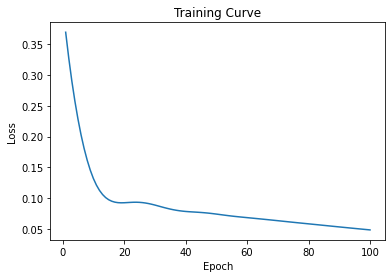

In [9]:
# 結果を図示
plt.figure()
plt.title('Training Curve')  # タイトル
plt.xlabel('Epoch')  # x軸のラベル
plt.ylabel('Loss')  # y軸のラベル
plt.plot(range(1, epoch+1), loss_list)  # 学習回数ごとの誤差をプロット
plt.show()  # プロットの表示